In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_original = pd.read_csv('raw_data/train.csv')
data_original.head(5)

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1


## Data cleaning functions

In [3]:
# (1) Deleting rows with Current.Loan.Amount equal to 99999999
data = data_original[data_original['Current.Loan.Amount'] != 99999999].copy()

In [4]:
# (2) Deleting rows where Credit.Score and Annual.Income are NA
data = data[data['Credit.Score'].notna()]
data = data[data['Annual.Income'].notna()]

In [5]:
# (3) Na coluna Home.Ownership, HaveMortgage substituido por Home Mortgage
data['Home.Ownership'] = data['Home.Ownership'].replace(['HaveMortgage'], 'Home Mortgage')  

In [6]:
# (4) If Years.in.current.job is null, fill out with "less than 1 year"
data['Years.in.current.job'] = data['Years.in.current.job'].fillna('less than 1 year')
data['Years.in.current.job'] = data['Years.in.current.job'].replace(['less than  1 year'], 'less than 1 year')  

In [7]:
# (5) If Bankruptcies are null, substitute by 0
data['Bankruptcies'] = data['Bankruptcies'].fillna(0)

In [8]:
# (6) If Tax.Liens are null, substitute by 0
data['Tax.Liens'] = data['Tax.Liens'].fillna(0)

In [9]:
# (7) If Credit.Score > 850 (maximum), divive by 10 (assuming there was a typing error)
#(e.g., instead of typing 750, person typed 7500)

def div(x):
    if x > 850:
        return x / 10
    else:
        return x

data['Credit.Score'] = data['Credit.Score'].apply(div)

array([[<AxesSubplot:title={'center':'Credit.Score'}>]], dtype=object)

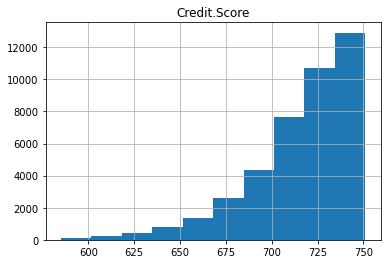

In [10]:
data.hist(['Credit.Score'])

In [11]:
data['Credit.Score'].describe()

count    41178.000000
mean       715.878187
std         28.442239
min        585.000000
25%        703.000000
50%        722.000000
75%        738.000000
max        751.000000
Name: Credit.Score, dtype: float64

In [14]:
data['Credit.Score.Buckets'] = data['Credit.Score']

def encoding_noab(x):
    if x < 703:
        return 'below'
    elif x >=730:
        return 'good'
    else:
        return 'average'

data['Credit.Score.Buckets'] = data['Credit.Score.Buckets'].apply(encoding_noab)

In [15]:
data['Credit.Score.Buckets'].value_counts()

good       15792
average    15138
below      10248
Name: Credit.Score.Buckets, dtype: int64